<a href="https://colab.research.google.com/github/w1767/MSc-project/blob/main/Forecasting__using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [118]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [119]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [120]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [121]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [122]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


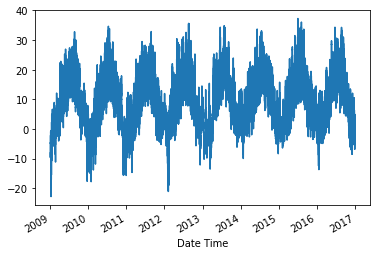

In [131]:
temp = df['T (degC)']
temp.plot()

In [130]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)



In [132]:
window_size = 5
X, y = df_to_X_y(temp, window_size)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [133]:
X


array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [134]:
y

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [155]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [157]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [158]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 24.5703 - root_mean_squared_error: 4.9568

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 24.5016 - root_mean_squared_error: 4.9499 - val_loss: 1.0860 - val_root_mean_squared_error: 1.0421
Epoch 2/10
1863/1875 [============================>.] - ETA: 0s - loss: 1.6416 - root_mean_squared_error: 1.2812

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 1.6395 - root_mean_squared_error: 1.2804 - val_loss: 0.6262 - val_root_mean_squared_error: 0.7913
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.8768 - root_mean_squared_error: 0.9364

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.8779 - root_mean_squared_error: 0.9370 - val_loss: 0.5521 - val_root_mean_squared_error: 0.7430
Epoch 4/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.7257 - root_mean_squared_error: 0.8519

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.7261 - root_mean_squared_error: 0.8521 - val_loss: 0.5182 - val_root_mean_squared_error: 0.7198
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6826 - root_mean_squared_error: 0.8262

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.6826 - root_mean_squared_error: 0.8262 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6669 - root_mean_squared_error: 0.8166 - val_loss: 0.5358 - val_root_mean_squared_error: 0.7320
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6581 - root_mean_squared_error: 0.8112

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6580 - root_mean_squared_error: 0.8112 - val_loss: 0.4968 - val_root_mean_squared_error: 0.7048
Epoch 8/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6531 - root_mean_squared_error: 0.8082

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.6530 - root_mean_squared_error: 0.8081 - val_loss: 0.4943 - val_root_mean_squared_error: 0.7031
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6482 - root_mean_squared_error: 0.8051

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6486 - root_mean_squared_error: 0.8053 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7015
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6470 - root_mean_squared_error: 0.8044 - val_loss: 0.5055 - val_root_mean_squared_error: 0.7110


In [159]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [160]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train_Predictions':train_predictions, 'Actual':y_train})
train_results

,Train_Predictions,Actual
0,-9.977690,-9.67
1,-9.790414,-9.17
2,-8.921872,-8.10
3,-7.433489,-7.66
4,-7.309038,-7.04
...,...,...
59995,6.067118,6.07
59996,7.253348,9.88
59997,12.333029,13.53
59998,16.042650,15.43


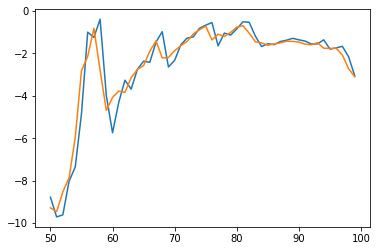

In [161]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train_Predictions'][50:100])
plt.plot(train_results['Actual'][50:100])


In [162]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,15.396158,14.02
1,13.177806,13.67
2,13.089440,12.27
3,11.532662,11.19
4,10.439878,10.85
...,...,...
4995,17.309256,18.27
4996,17.368921,17.85
4997,17.252789,16.65
4998,15.902463,15.85


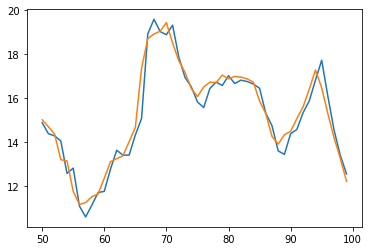

In [163]:
plt.plot(val_results['Val Predictions'][50:100])
plt.plot(val_results['Actuals'][50:100])

In [164]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,14.450666,13.99
1,13.293609,13.46
2,12.914071,12.93
3,12.504321,12.43
4,12.055779,12.17
...,...,...
5081,-0.976369,-0.98
5082,-1.431847,-1.40
5083,-1.692459,-2.75
5084,-3.152878,-2.89


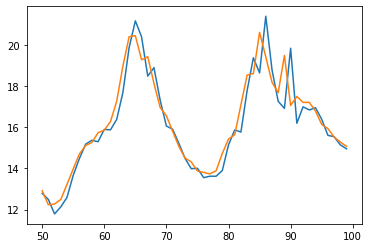

In [165]:
plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals'][50:100])

In [147]:
#use5 hours data points to predict. can use pressure and other data points other than temperature. use time stamp as well. 
#graph temperature over the years. use periodicity such as sin and cos to transform the data.why not predict pressure as well.
#lstm,gru, are RNNs. there are CNNs which are normally 2D but we can make it 1D. 

In [166]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model1, X, y, start=0, end=100):
  predictions = model1.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       14.450666    13.99
 1       13.293609    13.46
 2       12.914071    12.93
 3       12.504321    12.43
 4       12.055779    12.17
 ...           ...      ...
 5081    -0.976369    -0.98
 5082    -1.431847    -1.40
 5083    -1.692459    -2.75
 5084    -3.152878    -2.89
 5085    -3.142017    -3.93
 
 [5086 rows x 2 columns], 0.628370929136004)

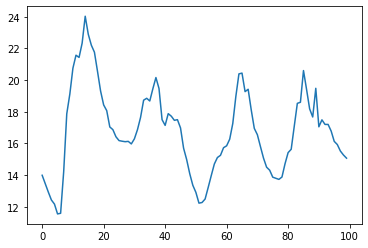

In [167]:
plot_predictions1(model1, X_test, y_test)

In [168]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 8)                 2056      
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6596 - root_mean_squared_error: 0.8121 - val_loss: 0.4967 - val_root_mean_squared_error: 0.7048
Epoch 2/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.6588 - root_mean_squared_error: 0.8117INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6575 - root_mean_squared_error: 0.8108 - val_loss: 0.4889 - val_root_mean_squared_error: 0.6992
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6563 - root_mean_squared_error: 0.8101 - val_loss: 0.4893 - val_root_mean_squared_error: 0.6995
Epoch 4/10
1850/1875 [============================>.] - ETA: 0s - loss: 0.6579 - root_mean_squared_error: 0.8111INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6578 - root_mean_squared_error: 0.8110 - val_loss: 0.4860 - val_root_mean_squared_error: 0.6971
Epoch 5/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.6570 - root_mean_squared_error: 0.8106INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6559 - root_mean_squared_error: 0.8099 - val_loss: 0.4859 - val_root_mean_squared_error: 0.6971
Epoch 6/10
1848/1875 [============================>.] - ETA: 0s - loss: 0.6566 - root_mean_squared_error: 0.8103INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6557 - root_mean_squared_error: 0.8098 - val_loss: 0.4843 - val_root_mean_squared_error: 0.6959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6547 - root_mean_squared_error: 0.8091 - val_loss: 0.4978 - val_root_mean_squared_error: 0.7056
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6553 - root_mean_squared_error: 0.8095 - val_loss: 0.5022 - val_root_mean_squared_error: 0.7087
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6554 - root_mean_squared_error: 0.8096 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6991
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6547 - root_mean_squared_error: 0.8091 - val_loss: 0.4916 - val_root_mean_squared_error: 0.7011


In [ ]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1864/1875 [============================>.] - ETA: 0s - loss: 3.5703 - root_mean_squared_error: 1.8895

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 3.5703 - root_mean_squared_error: 1.8895 - val_loss: 1.2923 - val_root_mean_squared_error: 1.1368
Epoch 2/10
1862/1875 [============================>.] - ETA: 0s - loss: 3.4592 - root_mean_squared_error: 1.8599

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 3.4578 - root_mean_squared_error: 1.8595 - val_loss: 1.2633 - val_root_mean_squared_error: 1.1240
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 3.3558 - root_mean_squared_error: 1.8319

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 3.3526 - root_mean_squared_error: 1.8310 - val_loss: 1.2101 - val_root_mean_squared_error: 1.1001
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 3.2439 - root_mean_squared_error: 1.8011

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 3.2492 - root_mean_squared_error: 1.8026 - val_loss: 1.1684 - val_root_mean_squared_error: 1.0809
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 3.1498 - root_mean_squared_error: 1.7748

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 3.1513 - root_mean_squared_error: 1.7752 - val_loss: 1.1344 - val_root_mean_squared_error: 1.0651
Epoch 6/10
1864/1875 [============================>.] - ETA: 0s - loss: 3.0628 - root_mean_squared_error: 1.7501

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 3.0592 - root_mean_squared_error: 1.7490 - val_loss: 1.0997 - val_root_mean_squared_error: 1.0486
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 2.9727 - root_mean_squared_error: 1.7241

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 2.9724 - root_mean_squared_error: 1.7241 - val_loss: 1.0963 - val_root_mean_squared_error: 1.0471
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 2.8893 - root_mean_squared_error: 1.6998

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 2.8873 - root_mean_squared_error: 1.6992 - val_loss: 1.0438 - val_root_mean_squared_error: 1.0217
Epoch 9/10
1872/1875 [============================>.] - ETA: 0s - loss: 2.8077 - root_mean_squared_error: 1.6756

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 2.8070 - root_mean_squared_error: 1.6754 - val_loss: 1.0178 - val_root_mean_squared_error: 1.0089
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 2.7314 - root_mean_squared_error: 1.6527

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 2.7289 - root_mean_squared_error: 1.6520 - val_loss: 0.9938 - val_root_mean_squared_error: 0.9969


In [169]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [170]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds']*(2*np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*(2*np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds']*(2*np.pi / year))
temp_df['Year cos'] = np.sin(temp_df['Seconds']*(2*np.pi / year))


In [171]:
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.010049
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.010766
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.011483
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.012199
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.012916


In [172]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.010049
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.010766
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.011483
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.012199
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.012916


In [173]:
# [[[t1, ds1], [t2, ds2], [t3, ds4], [t4, ds4], [t5, ds5]]] [t6]
# [[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]] [t7]
# [[[t3], [t4], [t5], [t6], [t7]]] [t8]
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [174]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [175]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [177]:
# : means we take ALL the examples of 6000 rows
# second : is the number of time steps so we want first hour, second hour, ..etc. 6 time step variables.
# 0 means we only want temperature. there are 5 variables and we want only temperature. 
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean)/ temp_training_std
  return X

In [178]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01,  5.22877889e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01,  5.22266764e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01,  5.21655371e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01,  5.21043709e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01,  5.20431780e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01,  5.19819584e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01,  5.22266764e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01,  5.21655371e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01,  5.21043709e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [181]:
model4 = Sequential()
model4.add(InputLayer((6,5))) # 6 time steps and 5 variables of interest
model4.add(GRU(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                13632     
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14,161
Trainable params: 14,161
Non-trainable params: 0
_________________________________________________________________


In [182]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [183]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 30.3223 - root_mean_squared_error: 5.5066

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 15s 7ms/step - loss: 30.3091 - root_mean_squared_error: 5.5054 - val_loss: 3.7617 - val_root_mean_squared_error: 1.9395
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 3.9699 - root_mean_squared_error: 1.9925

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 3.9671 - root_mean_squared_error: 1.9917 - val_loss: 2.2440 - val_root_mean_squared_error: 1.4980
Epoch 3/10
1864/1875 [============================>.] - ETA: 0s - loss: 2.1535 - root_mean_squared_error: 1.4675

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 2.1499 - root_mean_squared_error: 1.4663 - val_loss: 1.0477 - val_root_mean_squared_error: 1.0236
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 1.0650 - root_mean_squared_error: 1.0320

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 1.0643 - root_mean_squared_error: 1.0317 - val_loss: 0.5973 - val_root_mean_squared_error: 0.7728
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.7359 - root_mean_squared_error: 0.8578

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.7362 - root_mean_squared_error: 0.8580 - val_loss: 0.4914 - val_root_mean_squared_error: 0.7010
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6253 - root_mean_squared_error: 0.7907

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.6253 - root_mean_squared_error: 0.7907 - val_loss: 0.4683 - val_root_mean_squared_error: 0.6843
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5888 - root_mean_squared_error: 0.7673

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.5887 - root_mean_squared_error: 0.7673 - val_loss: 0.4514 - val_root_mean_squared_error: 0.6719
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5716 - root_mean_squared_error: 0.7560 - val_loss: 0.4762 - val_root_mean_squared_error: 0.6901
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5636 - root_mean_squared_error: 0.7507 - val_loss: 0.4655 - val_root_mean_squared_error: 0.6823
Epoch 10/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5595 - root_mean_squared_error: 0.7480

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.5593 - root_mean_squared_error: 0.7478 - val_loss: 0.4382 - val_root_mean_squared_error: 0.6620


(      Predictions  Actuals
 0       13.134882    13.46
 1       12.856075    12.93
 2       12.529721    12.43
 3       12.200253    12.17
 4       12.217368    11.55
 ...           ...      ...
 5080    -1.406847    -0.98
 5081    -1.607446    -1.40
 5082    -1.770800    -2.75
 5083    -3.291484    -2.89
 5084    -3.308695    -3.93
 
 [5085 rows x 2 columns], 0.5093434711431234)

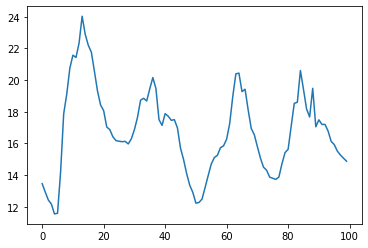

In [184]:
plot_predictions1(model4, X2_test, y2_test)

In [185]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.010049
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.010766
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.011483
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.012199
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.012916


In [197]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [200]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [201]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [202]:
# : means we take ALL the examples of 6000 rows
# second : is the number of time steps so we want first hour, second hour, ..etc. 6 time step variables.
# 0 means we only want temperature. there are 5 variables and we want only temperature. 
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y


In [203]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [204]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [205]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                18176     
                                                                 
 dense_30 (Dense)            (None, 8)                 520       
                                                                 
 dense_31 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [206]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [207]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.1714 - root_mean_squared_error: 0.4140

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 17s 8ms/step - loss: 0.1708 - root_mean_squared_error: 0.4133 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1854
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0244 - root_mean_squared_error: 0.1561

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0243 - root_mean_squared_error: 0.1559 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1221
Epoch 3/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1092

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0910
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0911

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0083 - root_mean_squared_error: 0.0911 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0792
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0814

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0066 - root_mean_squared_error: 0.0814 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0758

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0057 - root_mean_squared_error: 0.0758 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0675
Epoch 7/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0732

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0720

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0624
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0709

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0622


In [212]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]
  

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.416209,0.412451,-0.779550,-0.793439
1,0.376001,0.353683,-0.770969,-0.763123
2,0.334583,0.323123,-0.738099,-0.721893
3,0.330998,0.250251,-0.684555,-0.652773
4,0.272531,0.254952,-0.595455,-0.652773
...,...,...,...,...
95,0.695616,0.716869,-0.407598,-0.416310
96,0.662544,0.687485,-0.411291,-0.399333
97,0.650506,0.663978,-0.393689,-0.399333
98,0.656118,0.641646,-0.384086,-0.400546


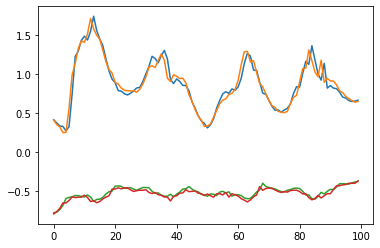

In [213]:
plot_predictions2(model5, X3_test, y3_test)

In [215]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr
def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [216]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

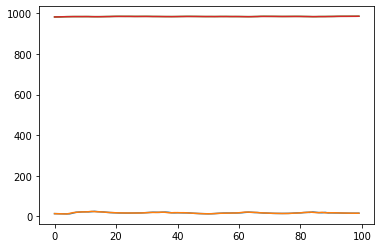

In [217]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)

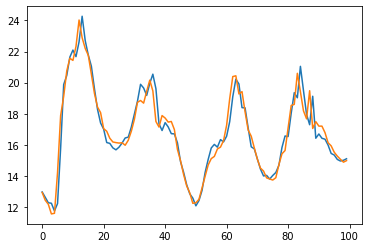

In [218]:
 start, end = 0, 100
 plt.plot(post_processed_df['Temperature Predictions'][start:end])
 plt.plot(post_processed_df['Temperature Actuals'][start:end])

In [221]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                18176     
                                                                 
 dense_30 (Dense)            (None, 8)                 520       
                                                                 
 dense_31 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [222]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [223]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.1629 - root_mean_squared_error: 0.4036

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 30s 14ms/step - loss: 0.1628 - root_mean_squared_error: 0.4035 - val_loss: 0.0441 - val_root_mean_squared_error: 0.2101
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0326 - root_mean_squared_error: 0.1806

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0326 - root_mean_squared_error: 0.1806 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1531
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1290

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 33s 17ms/step - loss: 0.0166 - root_mean_squared_error: 0.1290 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1034

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 38s 20ms/step - loss: 0.0107 - root_mean_squared_error: 0.1034 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0887
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0913

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 26s 14ms/step - loss: 0.0083 - root_mean_squared_error: 0.0913 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0826

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0068 - root_mean_squared_error: 0.0826 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0716
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0775

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 26s 14ms/step - loss: 0.0060 - root_mean_squared_error: 0.0775 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 8/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0753

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 34s 18ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0670
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0741

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 10/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0734

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 27s 14ms/step - loss: 0.0054 - root_mean_squared_error: 0.0734 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640


In [224]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))

model7.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_36 (Dense)            (None, 8)                 3080      
                                                                 
 dense_37 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [225]:
cp7 = ModelCheckpoint('model7/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [226]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.1124 - root_mean_squared_error: 0.3352INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.1114 - root_mean_squared_error: 0.3338 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1386
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1205INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0994
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.0970INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - root_mean_squared_error: 0.0970 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0832
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0883INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 2ms/step - loss: 0.0078 - root_mean_squared_error: 0.0883 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0783
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.0842INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - root_mean_squared_error: 0.0842 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0817INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - root_mean_squared_error: 0.0817 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 7/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0799INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0064 - root_mean_squared_error: 0.0799 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0062 - root_mean_squared_error: 0.0785 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 9/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0776INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681
Epoch 10/10
1852/1875 [============================>.] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0766INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0059 - root_mean_squared_error: 0.0765 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
